In [1]:
# Load dataframe
import pandas as pd

df = pd.read_csv('df_transformed.csv')
df

,approx_price_eur_scale,battery_mah_scale,ram_in_gb_scale,internal_memory_in_gb_scale,sales_scale,Year,id
0,0.128330,-0.437476,-0.044052,4.257224,0.000000,1996,Motorola StarTAC 75
1,-0.276517,-0.329107,-0.020638,1.214155,0.000000,1999,Nokia 3210
2,0.128330,-0.675550,-0.044052,4.257224,-0.397680,2003,Motorola C200
3,-0.045407,0.316401,-0.020638,1.235196,1.666777,2003,Nokia 1100
4,-0.529402,-0.543290,-0.979788,-0.961218,-0.832302,2003,Nokia 2100
...,...,...,...,...,...,...,...
64,0.113479,0.239685,0.223142,0.376161,-1.214988,2020,Samsung Galaxy S20 FE
65,-0.323034,0.800520,0.223142,-0.539386,-0.430112,2020,Xiaomi Redmi Note 9 Pro
66,-0.067348,0.283076,0.443965,-0.112864,0.000000,2022,Samsung Galaxy S22 Ultra 5G
67,-0.135367,-0.588093,-0.079736,-0.468127,0.000000,2023,Samsung Galaxy S23 FE


# Clustering Analysis

## Hierarchical clustering

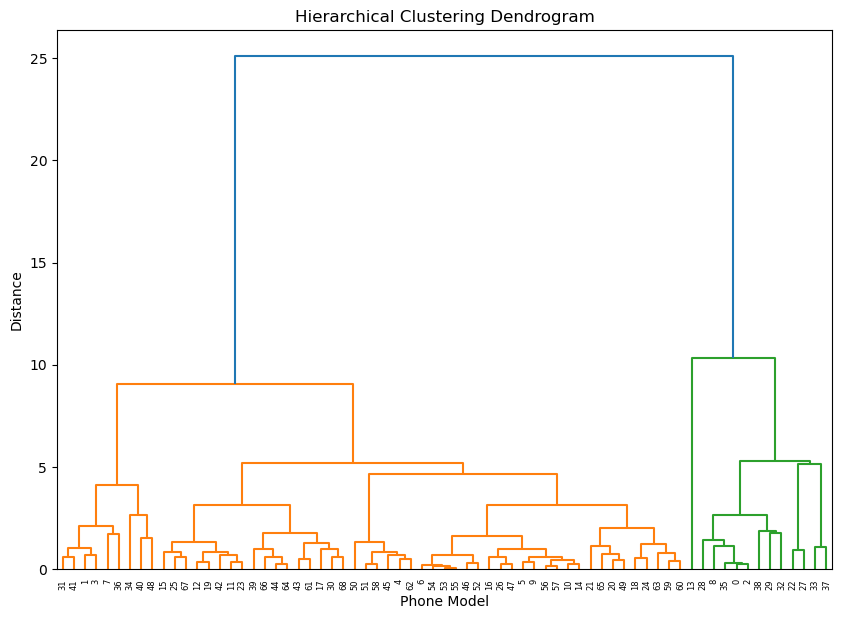

In [2]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Drop non-numerical columns
df_clustering = df.drop(['Year', 'id', 'sales_scale'], axis=1)

# Perform hierarchical clustering using the linkage function
Z = linkage(df_clustering, method='ward')

# Create a dendrogram to visualize the clustering
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Phone Model")
plt.ylabel("Distance")

# Save the plot
plt.savefig('../Plots/dendrogram.png', format='png')

plt.show()

In [3]:
from scipy.cluster.hierarchy import fcluster

# Specify the distance threshold to cut the dendrogram
max_d = 7
clusters = fcluster(Z, max_d, criterion='distance')

# Add the cluster labels to your dataframe
df_clustering['cluster'] = clusters
df_clustering

,approx_price_eur_scale,battery_mah_scale,ram_in_gb_scale,internal_memory_in_gb_scale,cluster
0,0.128330,-0.437476,-0.044052,4.257224,3
1,-0.276517,-0.329107,-0.020638,1.214155,1
2,0.128330,-0.675550,-0.044052,4.257224,3
3,-0.045407,0.316401,-0.020638,1.235196,1
4,-0.529402,-0.543290,-0.979788,-0.961218,2
...,...,...,...,...,...
64,0.113479,0.239685,0.223142,0.376161,2
65,-0.323034,0.800520,0.223142,-0.539386,2
66,-0.067348,0.283076,0.443965,-0.112864,2
67,-0.135367,-0.588093,-0.079736,-0.468127,2


(array([ 9.,  0.,  0., 47.,  0.,  0., 12.,  0.,  0.,  1.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

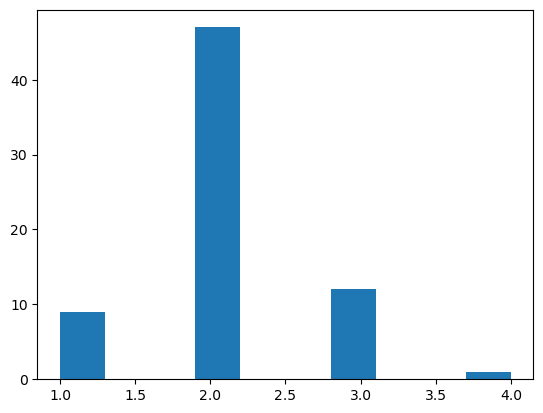

In [4]:
plt.hist(df_clustering['cluster'])

In [5]:
df_clustering = df_clustering[df_clustering['cluster'] != 4]

### Describing clusters

In [6]:
# Group by cluster and calculate mean for each feature
cluster_mean = df_clustering.groupby('cluster').mean()

(cluster_mean)

,approx_price_eur_scale,battery_mah_scale,ram_in_gb_scale,internal_memory_in_gb_scale
cluster,,,,
1,0.619610,0.385874,0.756008,1.532280
2,-0.271701,0.099026,-0.291425,-0.324432
3,0.403794,0.284715,0.637936,4.782917


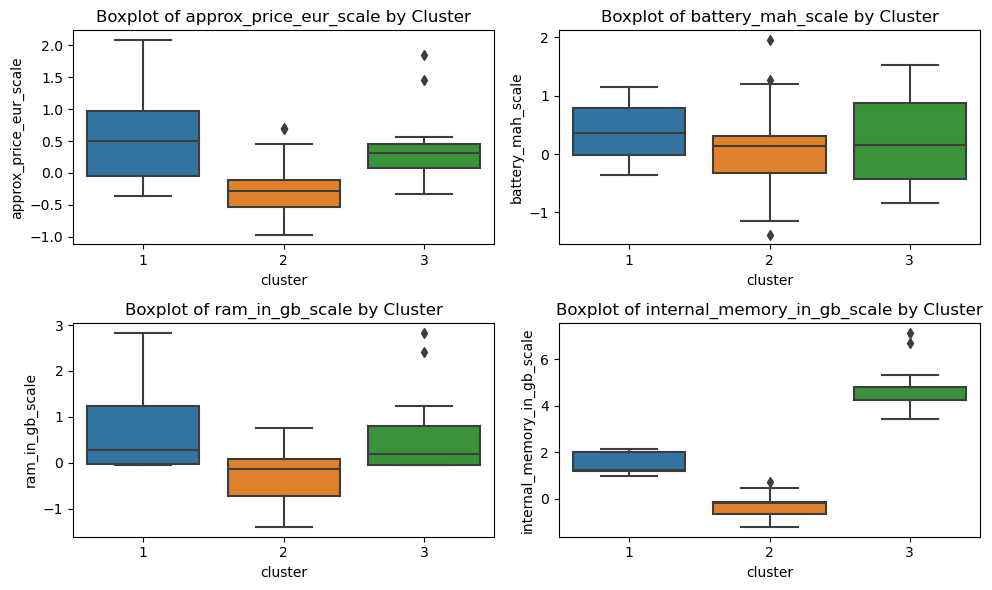

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create boxplots for each feature by cluster
features = ['approx_price_eur_scale', 'battery_mah_scale', 'ram_in_gb_scale', 'internal_memory_in_gb_scale']

plt.figure(figsize=(10, 6))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df_clustering, x='cluster', y=feature)
    plt.title(f'Boxplot of {feature} by Cluster')

plt.tight_layout()

# Save the plot as an image
plt.savefig('../Plots/boxplots.png', dpi=300, bbox_inches='tight')

plt.show()

C:\Users\Jessica Tran\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


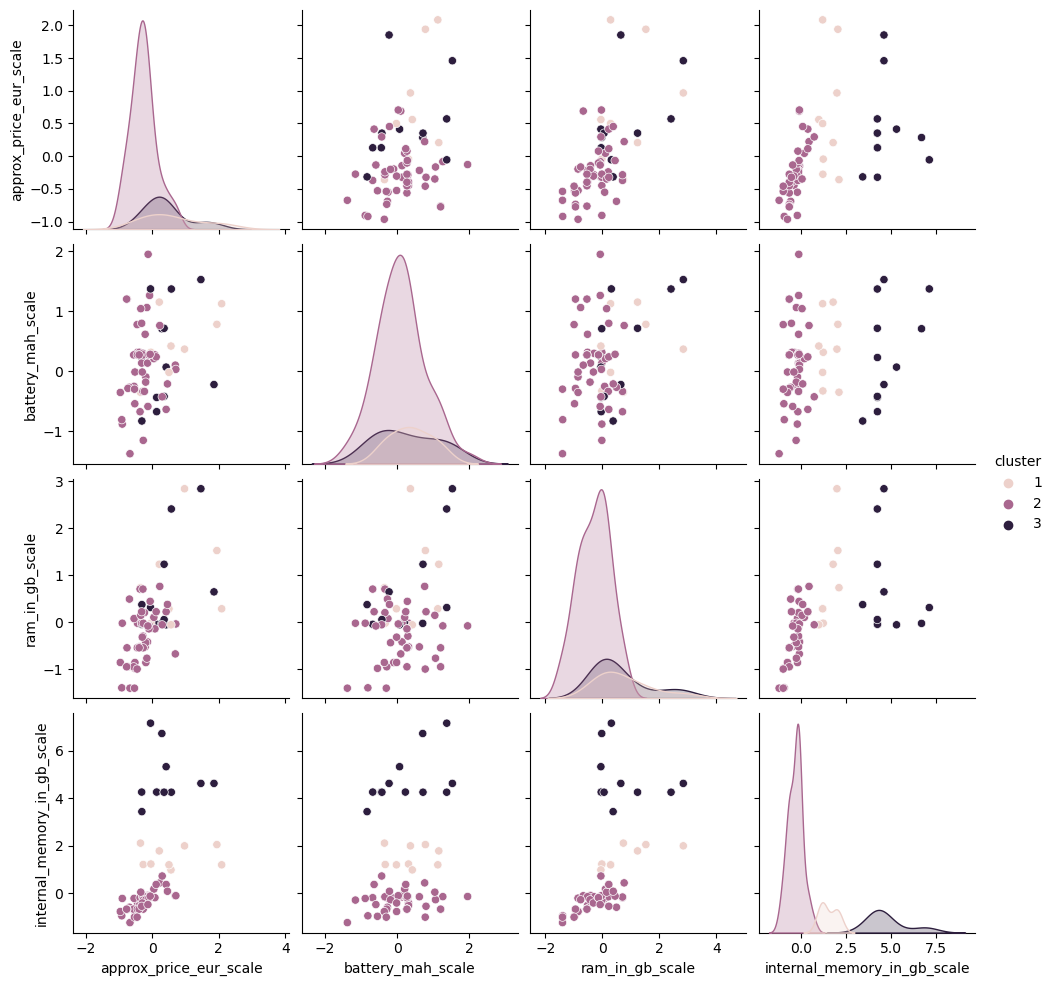

In [8]:
sns.pairplot(df_clustering, hue='cluster', vars=features)
plt.show()

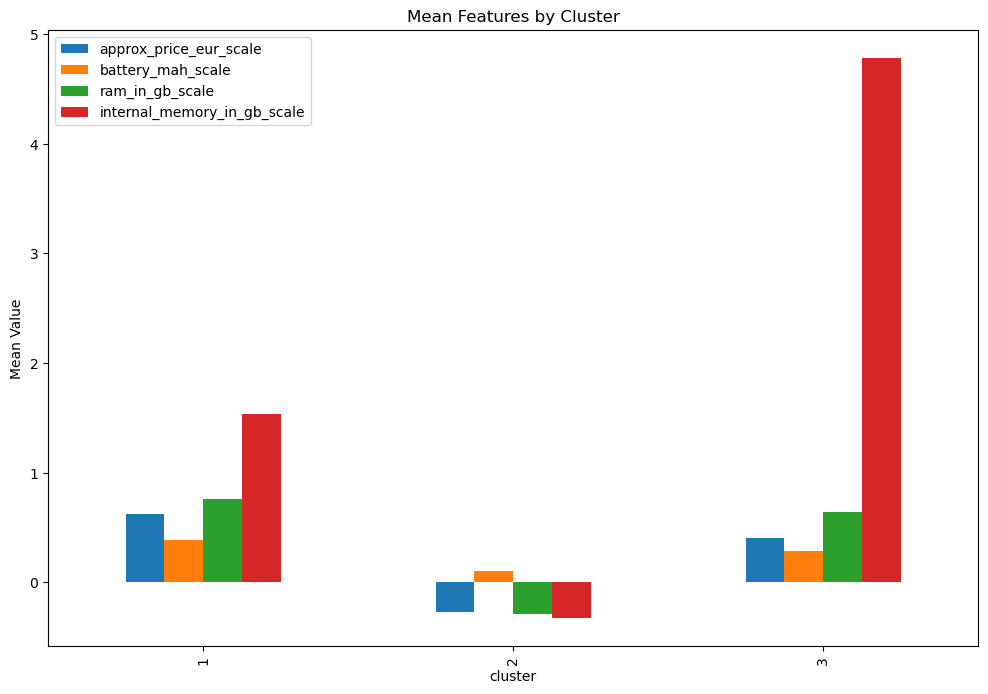

In [9]:
# Plot the mean values
cluster_mean.plot(kind='bar', figsize=(12, 8))
plt.title("Mean Features by Cluster")
plt.ylabel("Mean Value")
plt.show()

### Include sales

C:\Users\Jessica Tran\AppData\Local\Temp\ipykernel_18980\2468707566.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustering['sales_scale'] = df['sales_scale']


The cluster that generates the most sales is Cluster 3 with total sales of 1.7525860748398863.


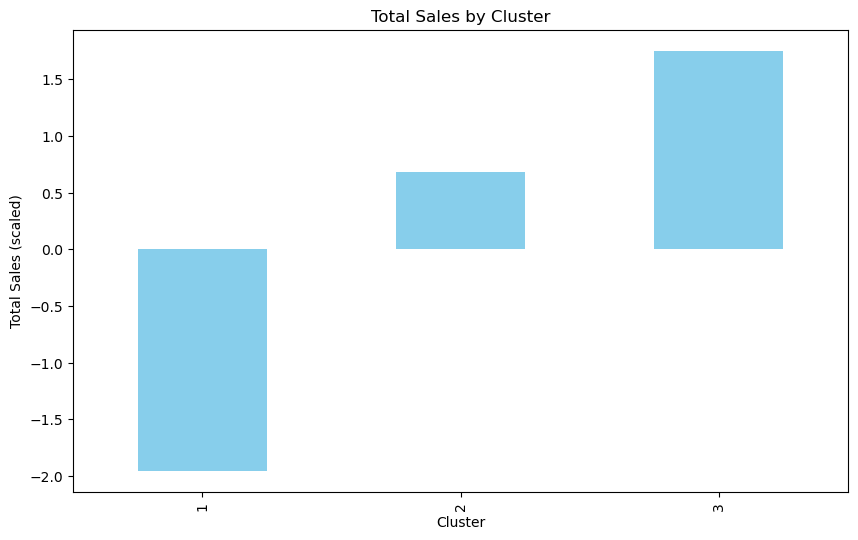

In [10]:
# Group by cluster and sum the sales
df_clustering['sales_scale'] = df['sales_scale']
total_sales_by_cluster = df_clustering.groupby('cluster')['sales_scale'].sum()

# Plot the total sales by cluster
total_sales_by_cluster.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title("Total Sales by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Total Sales (scaled)")

max_sales_cluster = total_sales_by_cluster.idxmax()
max_sales_value = total_sales_by_cluster.max()

print(f"The cluster that generates the most sales is Cluster {max_sales_cluster} with total sales of {max_sales_value}.")

plt.savefig('../Plots/total_sales.png')
plt.show()